# twitteR and R Understanding Vignette 
This is a twitteR and R vignette, which involved a lot of learning and use of different functions provided in the R programming language and the twitteR library.


In [2]:
#Importing required twitteR library
library(twitteR)
library(RSQLite)

In [3]:
#Setting up Twitter Oath
setup_twitter_oauth("yiYmkK3D1Lkce9KH37Q8RQXdz", "VLNYdjRXNQ3Tp6Mo5k7YEA9x8NPHdtADIRRM8DhM6Xv8Sx8quz", "1605909084-OcgJIf5nid4Axf6QZSbPGKIhQMyWwm9v73DjxXC", "OK1I2aSsjvbjP1erIAw4a3hB9B6el9YdKoA5XYZ6zXXya")

[1] "Using direct authentication"


In [4]:
#Using the Twitter Search API to search for tweets and then printing the first 6 tweets using head function of R
searchResults <- searchTwitter("Trump", n=50)
head(searchResults)

[[1]]
[1] "PensadorAzul_09: I haven't experienced \"love\" in a while so it's a lot of things that trump it down my list. Shit happens *shrugs*"

[[2]]
[1] "wechoosewisdom: RT @timkmak: Lawfare: of course there's evidence that Trump colluded with Russia -- we just dismiss it because it's overt https://t.co/6Kw8…"

[[3]]
[1] "MichaelJMcAdams: RT @J_D_Landis: GO NORTH, YOUNG WOMAN!\nCanada Welcomes Tech Companies That Are Spooked by Trump https://t.co/iUke7gqb1F"

[[4]]
[1] "3ChicsPolitico: RT @MegKinnardAP: BREAKING: Spokesman says former Trump campaign chairman Paul Manafort is registering with US government as foreign agent."

[[5]]
[1] "allanbrauer: RT @thehill: Trump is unlikely to name China a \"currency manipulator,\" breaking a key campaign promise https://t.co/lPoMyRuKeE https://t.co…"

[[6]]
[1] "johnny26072: RT @mitchellvii: At this point, I honestly believe God gives Trump wisdom.  No one can be this consistently strategic and prophetic without…"


In [7]:
#Displaying tweets after removing the retweets from the tweets
head(strip_retweets(searchResults, strip_manual=TRUE, strip_mt=TRUE))

[[1]]
[1] "PensadorAzul_09: I haven't experienced \"love\" in a while so it's a lot of things that trump it down my list. Shit happens *shrugs*"

[[2]]
[1] "jpcrailjr: Trump Told China’s President About Syria Strike Over 'Beautiful' Chocolate Cake https://t.co/n7Z6Jl95lp"

[[3]]
[1] "warringworld: PATRICK BUCHANAN: Is Trump leading U.S. into another Middle East war? https://t.co/sUSuoBzHLs https://t.co/dMHs39zzTv"

[[4]]
[1] "ServativeCon: @CowtownCody @charlescwcooke Those same people are still mad that Hillary lost and Trump won. Funny how that works."

[[5]]
[1] "POSK_Od_Nowa: Watch LIVE: Donald Trump meets NATO Secretary General Jens Stoltenberg https://t.co/WE3DU83wut https://t.co/81076SY01d"

[[6]]
[1] "adzgb: Watch LIVE: Donald Trump meets NATO Secretary General Jens Stoltenberg https://t.co/ozqJheZe9n https://t.co/ySvOOo5ER4"


In [18]:
#Fetching user information from Twitter and displaying the vital information
userInfo <- getUser("POTUS")
print(userInfo$description)
print(userInfo$followersCount)
print(userInfo$location)

[1] "45th @POTUS @realDonaldTrump. Working on behalf of the American people to make our country great again. Tweets by @Scavino45. Tweets by #POTUS signed -DJT."
[1] 15450788
[1] "Washington, D.C."


In [22]:
#Converting the received tweets into a R Data Frame and displaying
dataFrame <- twListToDF(searchResults)
head(dataFrame, n=10)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @blackrepublican: Trump Is The White Marion Barry #BlackHistoryMonth #blacklivesmatter #tcot https://t.co/8uOxOPpvEo,FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120546168833,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",pegobry,7,TRUE,FALSE,NA,NA
"@SteveLAshton You claimed that Trump's win reflects the voice of the American people. He lost the popular vote, so that's incorrect. Fact.",FALSE,0,SteveLAshton,2017-02-17 05:22:13,FALSE,832458665659502592,832460120428720133,259928831,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",freedom2marry,0,FALSE,FALSE,NA,NA
The 'Press's treatment of Trump has been not been humane. https://t.co/WU7ce2tXch,FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120403513344,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",stanishr,0,FALSE,FALSE,NA,NA
"RT @CGTNOfficial: #Trump's pick for national security adviser turns down offer, says official https://t.co/VRzp0VibT0",FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120365764608,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",jordanhbaker,11,TRUE,FALSE,NA,NA
"RT @asamjulian: Everyone laughing after Trump rebranded CNN as #VeryFakeNews. Then they go on their networks saying how ""dangerous"" and ""no…",FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120357429248,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",listeningin35,489,TRUE,FALSE,NA,NA
@CNN I guess they'd rather do this than show trump calling them very fake news.,FALSE,0,CNN,2017-02-17 05:22:13,FALSE,832392475432120326,832460120252510210,759251,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",patriotinfidel8,0,FALSE,FALSE,NA,NA
"RT @SkyNews: ""I'm not ranting and raving"" says the @POTUS before coining a new phrase: ""very fake news"" #Trump https://t.co/gahiOzrTRz",FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120105721856,NA,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",Dwaipayana,452,TRUE,FALSE,NA,NA
RT @ARnews1936: Conservative activists to mobilize amid anti-Trump protests https://t.co/FkVhVRgDrQ,FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460120021798913,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",SlickSamD,10,TRUE,FALSE,NA,NA
RT @DavidYankovich: Totally fucking pathetic. Trump's propaganda tour is again paying people to clap and cheer. Send this around ⬇ https://…,FALSE,0,NA,2017-02-17 05:22:13,FALSE,NA,832460119833141249,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",katruthe,878,TRUE,FALSE,NA,NA
"Donald Trump’s first month in office: Four weeks of fights, chaos and dysfunction from a 'fine-tuned machine'… https://t.co/7WBF9IbaeE",FALSE,0,NA,2017-02-17 05:22:13,TRUE,NA,832460119803719685,NA,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",OneNewsSource,0,FALSE,FALSE,NA,NA


In [7]:
#Saving data to the Database
sqlite_file <- tempfile()
register_sqlite_backend(sqlite_file)
store_tweets_db(searchResults)

[1] TRUE

In [12]:
#Retrieving Data from the Database and displaying
db_data <- load_tweets_db()
print(db_data)

[[1]]
[1] "bbdevices: RT @markknoller: Spicer says Pres Trump will confer Sunday with remaining candidates for National Security Advisor including: https://t.co/…"

[[2]]
[1] "JupiterKrash: RT @Khanoisseur: 9. But wait, there's more-those 2 Trump buildings that Vornado's Roth controls? \n\nTrump is on the hook for ~$500 million i…"

[[3]]
[1] "techsmartly: RT @NateSilver538: I've noticed a fair amount of cherry-picking when it comes to Trump's approval ratings. Polling averages have him at ~45…"

[[4]]
[1] "ThePattyB: RT @homohomo: Fox News (!) taking poll \"Do U Think There Shld Be A Deeper \xed\xa0\xbd\xed\xb4\x8d into 45* WH\" RT &amp; Vote! We are winning! https://t.co/N38iow9AlJ…"

[[5]]
[1] "RickAndKim30yrs: RT @RSBNetwork: LIVE now from Melbourne, FL where President Trump will rally soon! @Lookner and @margaretjhowell are live on scene! https:/…"

[[6]]
[1] "EffieShrevee: LIB BOYCOTT FAILS - Ivanka Trump Brand Soars to #1 on Amazon Best Sellers List -- https://t.co/bS206g7knn"



In [13]:
#Displaying User timelines
user_tweets <- userTimeline("POTUS")
user_tweets[1:10]

[[1]]
[1] "POTUS: Congratulations to our new @EPA Administrator, Scott Pruitt! https://t.co/TuZFWdrTmn"

[[2]]
[1] "POTUS: Just arrived in South Carolina!\nhttps://t.co/EFvXOKa8ur https://t.co/I9SF9Fc0zM"

[[3]]
[1] "POTUS: #MakeAmericaGreatAgain https://t.co/iwkcH3BBAG"

[[4]]
[1] "POTUS: 'President Trump: Putting Coal Country Back to Work'\nhttps://t.co/t8mgQJq0fL"

[[5]]
[1] "POTUS: 'President Trump Hosts Israeli Prime Minister Benjamin Netanyahu at the White House' https://t.co/5bRbbeHhKK https://t.co/iJYf9AU89t"

[[6]]
[1] "POTUS: Join us live! -DJT https://t.co/2qhxW1Cukd"

[[7]]
[1] "POTUS: Join me live - for a listening session with the Retail Industry Leaders Association at the @WhiteHouse. \nWatch: https://t.co/CQIWupTTb9"

[[8]]
[1] "POTUS: Looking forward as well Prime Minister @netanyahu. https://t.co/2M2zrPEbNO"

[[9]]
[1] "POTUS: Congratulations to our new Administrator of the Small Business Administration, Linda McMahon! Swearing-in:… https://t.co/lEkOxCr0bV"

[[10]]
[1

In [25]:
#Finding and displaying Available Trend locations
available <- availableTrendLocations()
print(available)

                    name              country    woeid
1              Worldwide                             1
2               Winnipeg               Canada     2972
3                 Ottawa               Canada     3369
4                 Quebec               Canada     3444
5               Montreal               Canada     3534
6                Toronto               Canada     4118
7               Edmonton               Canada     8676
8                Calgary               Canada     8775
9              Vancouver               Canada     9807
10            Birmingham       United Kingdom    12723
11             Blackpool       United Kingdom    12903
12           Bournemouth       United Kingdom    13383
13              Brighton       United Kingdom    13911
14               Bristol       United Kingdom    13963
15               Cardiff       United Kingdom    15127
16              Coventry       United Kingdom    17044
17                 Derby       United Kingdom    18114
18        

In [30]:
#Displaying Top 10 Twitter trends worldwide using the Woeid for worldwide found from the last block
trends <- getTrends(woeid = 1)
head(trends, n=10)

name,url,query,woeid
#PresidentialTVShows,http://twitter.com/search?q=%23PresidentialTVShows,%23PresidentialTVShows,1
#HTGAWM,http://twitter.com/search?q=%23HTGAWM,%23HTGAWM,1
#BuyLoveIncredibleOnItunes,http://twitter.com/search?q=%23BuyLoveIncredibleOnItunes,%23BuyLoveIncredibleOnItunes,1
#Scandal,http://twitter.com/search?q=%23Scandal,%23Scandal,1
春一番,http://twitter.com/search?q=%E6%98%A5%E4%B8%80%E7%95%AA,%E6%98%A5%E4%B8%80%E7%95%AA,1
#EmocionesYSentimientos,http://twitter.com/search?q=%23EmocionesYSentimientos,%23EmocionesYSentimientos,1
치코리타,http://twitter.com/search?q=%EC%B9%98%EC%BD%94%EB%A6%AC%ED%83%80,%EC%B9%98%EC%BD%94%EB%A6%AC%ED%83%80,1
코믹콘,http://twitter.com/search?q=%EC%BD%94%EB%AF%B9%EC%BD%98,%EC%BD%94%EB%AF%B9%EC%BD%98,1
Leo Rosenwasser,http://twitter.com/search?q=%22Leo+Rosenwasser%22,%22Leo+Rosenwasser%22,1
Hayırlı Cumalar,http://twitter.com/search?q=%22Hay%C4%B1rl%C4%B1+Cumalar%22,%22Hay%C4%B1rl%C4%B1+Cumalar%22,1


In [19]:
#A simple example for fetching tweets and plotting their source (device used to tweet) as a pie chart
fetched_tweets <- searchTwitter("#HTGAWM", n=300)
sources <- sapply(fetched_tweets, function(x) x$getStatusSource())
sources <- gsub("</a>", "", sources)
sources <- strsplit(sources, ">")
sources <- sapply(sources, function(x) ifelse(length(x) > 1, x[2], x[1]))
source_table = table(sources)

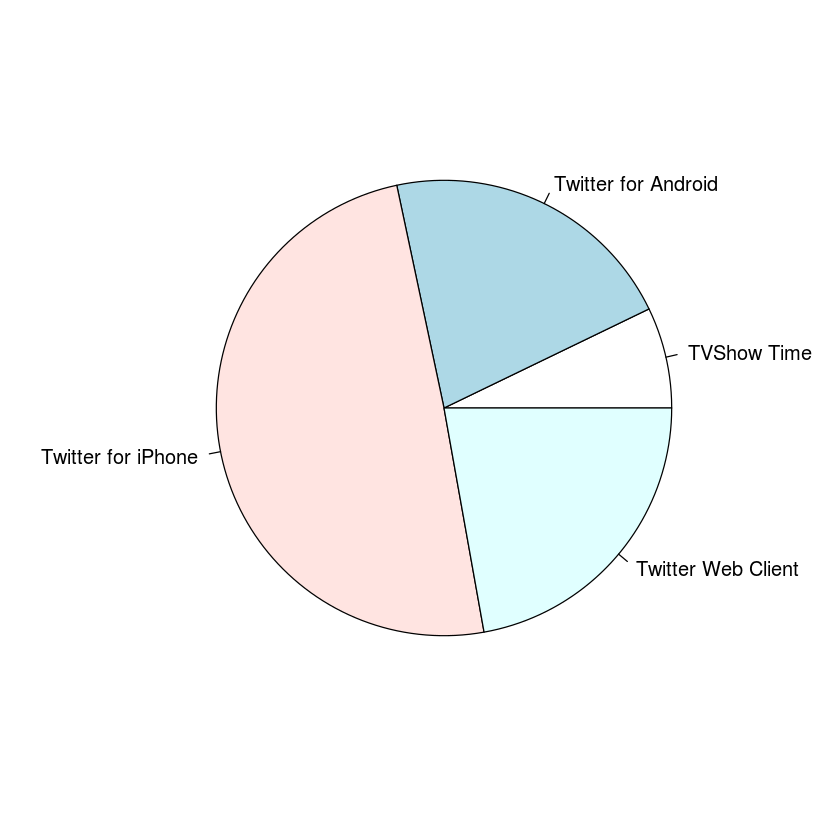

In [20]:
pie(source_table[source_table > 10])